## Data Visualization

### Bokeh 
-  Interactive charts visualization. 

- Bokeh renders its plots using HTML and JavaScript 
- Uses modern web browsers for presenting elegant, concise construction of novel graphics with high-level interactivity. 

In [ ]:
pip install wordcloud --trusted-host pypi.org --trusted-host files.pythonhosted.org numpy --upgrade

In [1]:
import bokeh

In [2]:
import bokeh
from bokeh.io import show
from bokeh.models import Button, CheckboxGroup, RadioGroup, CustomJS

button = Button(label="GFG")

button.js_on_click(CustomJS(
	code="console.log('button: click!', this.toString())"))

# Labels for checkbox and radio
# buttons
L = ["First", "Second", "Third"]

# the active parameter sets checks the selected value
# by default
checkbox_group = CheckboxGroup(labels=L, active=[0, 2])

checkbox_group.js_on_click(CustomJS(code="""
	console.log('checkbox_group: active=' + this.active, this.toString())
"""))

# the active parameter sets checks the selected value
# by default
radio_group = RadioGroup(labels=L, active=1)

radio_group.js_on_click(CustomJS(code="""
	console.log('radio_group: active=' + this.active, this.toString())
"""))

show(button)
show(checkbox_group)
show(radio_group)


In [3]:
from bokeh.io import show
from bokeh.models import CustomJS, Slider

slider = Slider(start=1, end=20, value=1, step=2, title="Slider")

slider.js_on_change("value", CustomJS(code="""
	console.log('slider: value=' + this.value, this.toString())
"""))

show(slider)


## Plotly
- Plotly has hover tool capabilities that allow us to detect any outliers or anomalies in numerous data points.
- It allows more customization.
- It makes the graph visually more attractive

In [4]:
import pandas as pd

data = pd.read_excel("Employee_data.xlsx")
data.head(2)
#data.describe()
#data["Years At Company"].sum()

,Gender,Employee Number,Job roles,Total Working Years,Work Life Balance,Performance Rating,Years At Company,Age
0,Female,1527,Workforce Management,16.0,4.0,4.8,6.5,38.0
1,Female,1529,Employee relations,16.0,1.0,4.8,6.5,38.0


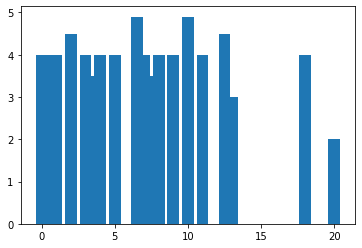

In [6]:
import matplotlib.pyplot as plt
x=data["Years At Company"]
y=data["Performance Rating"]
plt.bar(x,y)
plt.show()

In [8]:
import plotly.express as px


# plotting the bar chart
fig = px.bar(data, x='Years At Company', y='Performance Rating') #color='Gender')

# showing the plot
fig.show()

In [9]:
import plotly.express as px


# plotting the bar chart
fig = px.bar(data, y='Job roles', x='Years At Company',color='Gender')

# showing the plot
fig.show()


In [ ]:
d={"A":1}

In [10]:
import plotly.graph_objects as px


plot = px.Figure(data=[px.Scatter(
	x=data['Work Life Balance'],
	y=data['Years At Company'],
	mode='markers',)
])

# Add dropdown
plot.update_layout(
	updatemenus=[
		dict(
			buttons=list([
				dict(
					args=["type", "scatter"],
					label="Scatter Plot",
					method="restyle"
				),
				dict(
					args=["type", "bar"],
					label="Bar Chart",
					method="restyle"
				)
			]),
			direction="down",
		),
	]
)

plot.show()


## Connecting to Database using Python
The Python standard for database interfaces is the Python DB-API.In most of the cases one have download a separate DB API module for each database access.

The DB API provides a minimal standard for working with databases using Python structures and syntax wherever possible. This API includes the following −

### Importing the API module.
- Acquiring a connection with the database.
- Issuing SQL statements and stored procedures.
- Closing the connection

## 1. Database Connection: SQlite3

![image.png](attachment:image.png)

### What is SQLite?
SQLite is a relational database management system (In C) ,that implements a small, fast, self-contained, high-reliability, full-featured, SQL database engine.

- SQLite3 can be integrated with Python using sqlite3 module
- No need to install as it shipped by default along with Python version 2.5.x onwards.
- To use **sqlite3 module**, you must first create a connection object that represents the database and then optionally you can create a cursor object, which will help you in executing all the SQL statements.

- conda install -c blaze sqlite3 

### Important APIs

#### sqlite3.connect(database [,timeout ,other optional arguments])

- This API opens a connection to the SQLite database file. You can use ":memory:" to open a database connection to a database that resides in RAM instead of on disk. If database is opened successfully, it returns a connection object.

#### connection.cursor([cursorClass])

- This routine creates a cursor which will be used throughout of your database programming with Python. This method accepts a single optional parameter cursorClass.

#### cursor.execute(sql [, optional parameters])

- This routine executes an SQL statement. The SQL statement may be parameterized (i. e. placeholders instead of SQL literals). The sqlite3 module supports two kinds of placeholders: question marks and named placeholders (named style).

  For example − cursor.execute("insert into name values (?, ?)", (who, income))

#### connection.commit()

- This method commits the current transaction. If you don't call this method, anything you did since the last call to commit() is not visible from other database connections.

#### connection.rollback()

- This method rolls back any changes to the database since the last call to commit().

In [ ]:
Create table named Employees using SQLIte3,
EmpID,Name,Age,Jorole,Salary
primary Key, Char(15),Age(int),Jobrole Char(20),Salary(Real)

In [1]:
# Program to Connect to the exixting database
##If the database does not exist, then it will be created and finally a database object will be returned
import sqlite3

conn = sqlite3.connect('Sample1.db')

print ("My first Connection")

My first Connection


In [2]:
# Program to create a table in the previously created database
conn = sqlite3.connect('Sample1.db')
print ("Opened database successfully")

conn.execute('''CREATE TABLE Test
         (ID INT PRIMARY KEY     NOT NULL,
         NAME           TEXT    NOT NULL,
         AGE            INT     NOT NULL,
         ADDRESS        CHAR(50),
         SALARY         REAL);''')
print ("Table created......")

conn.close()

Opened database successfully
Table created......


In [3]:
## to create records in the COMPANY table created in the above example.
conn = sqlite3.connect('Sample1.db')
print ("Opened database successfully");

conn.execute("INSERT INTO Test(ID,NAME,AGE,ADDRESS,SALARY) \
      VALUES (7, 'Poy', 30, 'UP', 30000.00 )")

conn.execute("INSERT INTO Test (ID,NAME,AGE,ADDRESS,SALARY) \
      VALUES (8, 'Ram', 33, 'FARIDABAD', 18000.00 )")

conn.execute("INSERT INTO Test (ID,NAME,AGE,ADDRESS,SALARY) \
      VALUES (9, 'edd', 42, 'NEW DELHI', 22000.00 )")

conn.commit()
print ("Records updated successfully");
conn.close()

Opened database successfully
Records updated successfully


## SQLAlchemy is basically referred to as the toolkit of Python SQL that provides developers with the flexibility of using the SQL database.

- The benefit of using this particular library is to allow Python developers to work with the language’s own objects, and not write separate SQL queries
- They can basically use Python to access and work with databases
- SQLAlchemy is also an Object Relational Mapper which is a technique used to convert data between databases or OOP languages such as Python